In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (15 , 10)
sns.set_style('darkgrid')

In [3]:
function_val_epoch_elitism = []
function_val_epoch_random_search = []
function_val_epoch_basic_genetic = []
function_val_epoch_diversity = []

## Using Elitism 
### Average Results: Minimum Value of fitness is between -8.7 and -9.50. Most of the time it is near -8.7. It also depends on the population size, with higher population size like >1000, it sometimes reached to a value of -9.7.

Gen: 5 X: [-0.8, -0.76, -0.09, -0.06, -0.4] Fit: -5.1163667428183
Gen: 10 X: [-0.8, -0.76, -0.09, -0.06, -0.4] Fit: -5.1163667428183
Gen: 15 X: [-0.8, -0.76, -0.09, -0.06, -0.4] Fit: -5.1163667428183
Gen: 20 X: [-0.8, -0.76, -0.09, -0.06, -0.4] Fit: -5.1163667428183
Gen: 25 X: [-0.7, -0.11, -0.61, -0.17, -0.19] Fit: -5.879661700246153
Gen: 30 X: [-0.7, -0.11, -0.61, -0.17, -0.19] Fit: -5.879661700246153
Gen: 35 X: [-0.44, -0.02, -0.16, -0.34, -0.02] Fit: -6.570418404404528
Gen: 40 X: [-0.05, -0.16, -0.23, -0.39, -0.09] Fit: -6.822674138367253
Gen: 45 X: [-0.05, -0.16, -0.23, -0.39, -0.09] Fit: -6.822674138367253
Gen: 50 X: [-0.09, -0.76, -0.05, -0.11, -0.04] Fit: -6.891377926732752
Gen: 55 X: [-0.09, -0.76, -0.05, -0.11, -0.04] Fit: -6.891377926732752
Gen: 60 X: [-0.06, -0.57, -0.39, -0.31, -0.17] Fit: -7.043979757113863
Gen: 65 X: [-1.02, -0.14, -0.23, -0.31, -0.01] Fit: -7.286555813344302
Gen: 70 X: [-0.25, -0.05, -0.34, -0.21, -0.2] Fit: -7.361184462392697
Gen: 75 X: [-0.23, -0.13, 

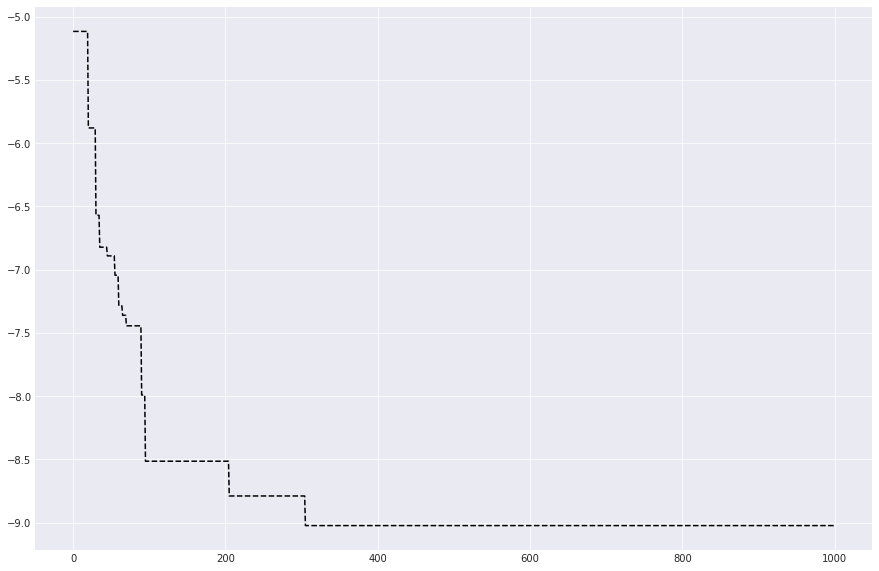

In [4]:
function_val_epoch_elitism = []
RANGE_OF_X = [-2.04 , 2.04]
POPULATION_SIZE = 1000
GENES = ["01" , "012" , "0123456789", "0123456789"]
TARGET_LENGTH = 4
CROSSOVER_PROB = 0.1
h = 1e-7
X_SIZE = 5

np.random.seed(np.random.randint(low=0 , high=100))
random.seed(np.random.randint(low=0 , high=100))


def f1(X):
    return np.sum(np.square(X))

def f2(X):
    return np.sum(np.floor(X))

def f3(X):
    return np.sum(np.multiply(np.arange(len(X)) , np.power(X , 4) ) ) + np.random.standard_normal(1)[0]

def g(X):
    return f1(X) + f2(X) + f3(X)

def determine_target_length(range_of_x):
    n = max(range_of_x)
    return int(np.ceil(np.log(n)/np.log(2)))

def getNum(l):
    num_str=""
    if l[0] == "1":
        num_str+="-"
    num_str += "{}.{}{}".format(l[1] , l[2], l[3])
    return float(num_str)

def inRange(l , range_of_x):
    num = getNum(l)
    return min(range_of_x)<= num <= max(range_of_x)

class Individual(object):

    def __init__(self,chromosome):
        self.chromosome = chromosome
        self.fitness = self.calculate_fitness()

    @classmethod 
    def mutate(self , digit_num:int):
        global GENES
        return random.choice(GENES[digit_num])
    
    @classmethod
    def create_gnome(self):
        global TARGET_LENGTH
        global RANGE_OF_X
        global X_SIZE
        gnome = []
        for i in range(X_SIZE):
            while True:
                l = [self.mutate(i) for i in range(TARGET_LENGTH)]
                if (inRange(l , RANGE_OF_X)):
                    gnome.append(l)
                    break
        return gnome


    def mate(self , par2):
        global CROSSOVER_PROB
        child_chromosome = []
        
        for gp1 , gp2 in zip(self.chromosome , par2.chromosome):
            child_part_chromosome = []
#             print(gp1)
            for i in range(len(gp1)):
                probability_of_crossover = random.random()
                if (probability_of_crossover > CROSSOVER_PROB):
                    # do crossover
                    probability_of_p1_gene = random.random()
                    if probability_of_p1_gene > 0.5:
                        child_part_chromosome.append(gp1[i])
                    else:
                        child_part_chromosome.append(gp2[i])
                else:
                    # do mutation
                    child_part_chromosome.append(self.mutate(i))
            child_chromosome.append(child_part_chromosome)
        return Individual(child_chromosome)

    def calculate_fitness(self):
        global TARGET_LENGTH
        X = []
        for s in self.chromosome:
            #print(s)
            #s = ''.join(map(str, self.chromosome))
            x = getNum(s)
            X.append(x)
        return g(X)
        


global POPULATION_SIZE
global TARGET_LENGTH
global RANGE_OF_X

# TARGET_LENGTH = determine_target_length(RANGE_OF_X)

generation = 1

count = 1000

population = []
for _ in range(POPULATION_SIZE):
    gnome = Individual.create_gnome()
    population.append(Individual(gnome))

while count!=0:
    count-=1
    population = sorted(population , key = lambda x:x.fitness)


    # performing elitism
    new_generation = []

    s = int(0.10*POPULATION_SIZE)
    new_generation.extend(population[:s])

    s = int(0.90*POPULATION_SIZE)

    for _ in range(s):
        parent1 = random.choice(population[:POPULATION_SIZE//2])
        parent2 = random.choice(population[:POPULATION_SIZE//2])
        child = parent1.mate(parent2)
        new_generation.append(child)

    if generation % 5 ==0:
        population = new_generation
        get_num_arr = []
        for l in population[0].chromosome:
            get_num_arr.append(getNum(l))
        print("Gen: {} X: {} Fit: {}".format(generation, get_num_arr, population[0].fitness))

    function_val_epoch_elitism.append(population[0].fitness)
    generation += 1

get_num_arr = []
for l in population[0].chromosome:
    get_num_arr.append(getNum(l))
print("Gen: {} X: {}\tMinimimum Value: {}".format(generation, get_num_arr, population[0].fitness))


plt.plot(range(len(function_val_epoch_elitism)) , function_val_epoch_elitism , "k--")

## Using Basic Genetic Algorithm
### The minimum value of fitness achieved is between -8.4 to -9.0.

Gen: 5 X: [-0.43, 0.09, -0.06, -0.04, 0.05] Fit: -3.7865567921665204
Gen: 10 X: [-0.48, 0.64, -0.35, -0.11, -0.38] Fit: -5.0429321164847725
Gen: 15 X: [-0.48, 0.64, -0.35, -0.11, -0.38] Fit: -5.0429321164847725
Gen: 20 X: [-0.48, 0.64, -0.35, -0.11, -0.38] Fit: -5.0429321164847725
Gen: 25 X: [-0.48, 0.64, -0.35, -0.11, -0.38] Fit: -5.0429321164847725
Gen: 30 X: [-0.48, 0.64, -0.35, -0.11, -0.38] Fit: -5.0429321164847725
Gen: 35 X: [-0.48, 0.64, -0.35, -0.11, -0.38] Fit: -5.0429321164847725
Gen: 40 X: [-0.48, 0.64, -0.35, -0.11, -0.38] Fit: -5.0429321164847725
Gen: 45 X: [-0.3, -0.23, 0.57, -0.05, -0.36] Fit: -5.482656471541309
Gen: 50 X: [-0.3, -0.23, 0.57, -0.05, -0.36] Fit: -5.482656471541309
Gen: 55 X: [-0.48, -0.31, -0.33, -0.15, -0.13] Fit: -6.622905122564039
Gen: 60 X: [-0.48, -0.31, -0.33, -0.15, -0.13] Fit: -6.622905122564039
Gen: 65 X: [-0.48, -0.31, -0.33, -0.15, -0.13] Fit: -6.622905122564039
Gen: 70 X: [-0.48, -0.31, -0.33, -0.15, -0.13] Fit: -6.622905122564039
Gen: 75 X: [

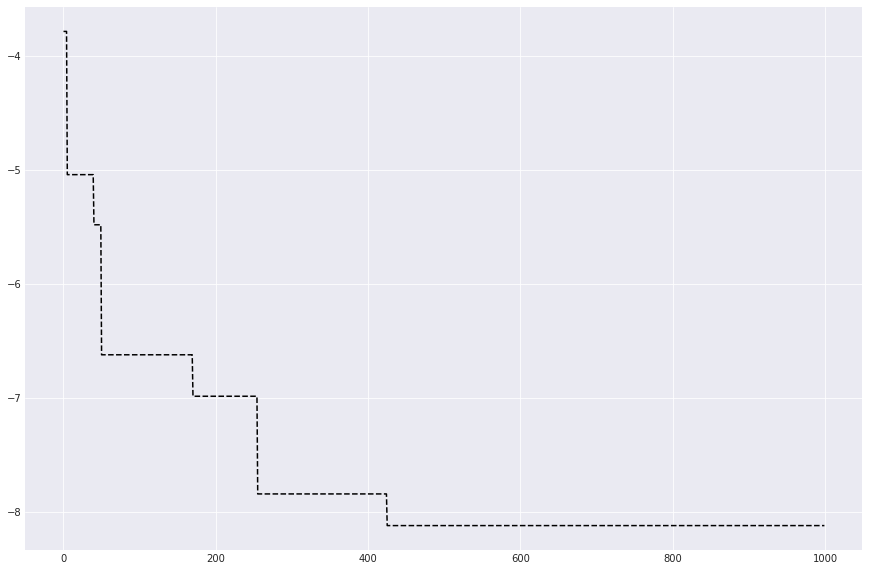

In [5]:
function_val_epoch_basic_genetic = []
RANGE_OF_X = [-2.04 , 2.04]
POPULATION_SIZE = 1000
GENES = ["01" , "012" , "0123456789", "0123456789"]
TARGET_LENGTH = 4
CROSSOVER_PROB = 0.1
h = 1e-7
X_SIZE = 5

np.random.seed(np.random.randint(low=0 , high=100))
random.seed(np.random.randint(low=0 , high=100))

def f1(X):
    return np.sum(np.square(X))

def f2(X):
    return np.sum(np.floor(X))

def f3(X):
    return np.sum(np.multiply(np.arange(len(X)) , np.power(X , 4) ) ) + np.random.standard_normal(1)[0]

def g(X):
    return f1(X) + f2(X) + f3(X)

def determine_target_length(range_of_x):
    n = max(range_of_x)
    return int(np.ceil(np.log(n)/np.log(2)))

def getNum(l):
    num_str=""
    if l[0] == "1":
        num_str+="-"
    num_str += "{}.{}{}".format(l[1] , l[2], l[3])
    return float(num_str)

def inRange(l , range_of_x):
    num = getNum(l)
    return min(range_of_x)<= num <= max(range_of_x)

class Individual(object):

    def __init__(self,chromosome):
        self.chromosome = chromosome
        self.fitness = self.calculate_fitness()

    @classmethod 
    def mutate(self , digit_num:int):
        global GENES
        return random.choice(GENES[digit_num])
    
    @classmethod
    def create_gnome(self):
        global TARGET_LENGTH
        global RANGE_OF_X
        global X_SIZE
        gnome = []
        for i in range(X_SIZE):
            while True:
                l = [self.mutate(i) for i in range(TARGET_LENGTH)]
                if (inRange(l , RANGE_OF_X)):
                    gnome.append(l)
                    break
        return gnome


    def mate(self , par2):
        child_chromosome = []
        global CROSSOVER_PROB
        for gp1 , gp2 in zip(self.chromosome , par2.chromosome):
            child_part_chromosome = []
#             print(gp1)
            for i in range(len(gp1)):
                probability_of_crossover = random.random()
                if (probability_of_crossover > CROSSOVER_PROB):
                    # do crossover
                    probability_of_p1_gene = random.random()
                    if probability_of_p1_gene > 0.5:
                        child_part_chromosome.append(gp1[i])
                    else:
                        child_part_chromosome.append(gp2[i])
                else:
                    # do mutation
                    child_part_chromosome.append(self.mutate(i))
            child_chromosome.append(child_part_chromosome)
        return Individual(child_chromosome)

    def calculate_fitness(self):
        global TARGET_LENGTH
        X = []
        for s in self.chromosome:
            #print(s)
            #s = ''.join(map(str, self.chromosome))
            x = getNum(s)
            X.append(x)
        return g(X)
        


global POPULATION_SIZE
global TARGET_LENGTH
global RANGE_OF_X

# TARGET_LENGTH = determine_target_length(RANGE_OF_X)

generation = 1

count = 1000

population = []

for _ in range(POPULATION_SIZE):
    gnome = Individual.create_gnome()
    population.append(Individual(gnome))

while count!=0:
    count-=1
    population = sorted(population , key = lambda x:x.fitness)


    # performing elitism
    new_generation = []

    s = int(0.10*POPULATION_SIZE)
    new_generation.extend(population[:s])

    s = int(0.90*POPULATION_SIZE)

    for _ in range(s):
        # no elitism
        parent1 = random.choice(population[:POPULATION_SIZE])
        parent2 = random.choice(population[:POPULATION_SIZE])
        child = parent1.mate(parent2)
        new_generation.append(child)

    if generation % 5 ==0:
        population = new_generation
        get_num_arr = []
        for l in population[0].chromosome:
            get_num_arr.append(getNum(l))
        print("Gen: {} X: {} Fit: {}".format(generation, get_num_arr, population[0].fitness))

    function_val_epoch_basic_genetic.append(population[0].fitness)
    generation += 1

get_num_arr = []
for l in population[0].chromosome:
    get_num_arr.append(getNum(l))
print("Gen: {} X: {}\tMinimimum Value: {}".format(generation, get_num_arr, population[0].fitness))


plt.plot(range(len(function_val_epoch_basic_genetic)) , function_val_epoch_basic_genetic , "k--")

## Using Diversity:

Gen: 5 X: [-0.02, -0.1, -0.02, -0.24, -0.61] Fit: -3.937674329374512
Gen: 10 X: [-1.54, -0.15, -0.4, -0.29, -0.27] Fit: -4.312514106136908
Gen: 15 X: [-1.54, -0.15, -0.4, -0.29, -0.27] Fit: -4.312514106136908
Gen: 20 X: [-0.26, -0.82, -0.22, -0.57, -0.37] Fit: -4.964899514920933
Gen: 25 X: [-0.26, -0.82, -0.22, -0.57, -0.37] Fit: -4.964899514920933
Gen: 30 X: [0.68, -0.07, -0.12, -0.54, -0.27] Fit: -5.289523224350354
Gen: 35 X: [0.68, -0.07, -0.12, -0.54, -0.27] Fit: -5.289523224350354
Gen: 40 X: [-0.42, -0.1, -0.02, -0.36, -0.14] Fit: -5.527993746677225
Gen: 45 X: [-0.42, -0.1, -0.02, -0.36, -0.14] Fit: -5.527993746677225
Gen: 50 X: [-0.42, -0.1, -0.02, -0.36, -0.14] Fit: -5.527993746677225
Gen: 55 X: [-1.12, -0.41, -0.35, -0.37, -0.55] Fit: -6.05226898572454
Gen: 60 X: [0.12, -0.11, -0.41, -0.27, -0.1] Fit: -6.453007986388743
Gen: 65 X: [0.12, -0.11, -0.41, -0.27, -0.1] Fit: -6.453007986388743
Gen: 70 X: [0.12, -0.11, -0.41, -0.27, -0.1] Fit: -6.453007986388743
Gen: 75 X: [0.12, -0.1

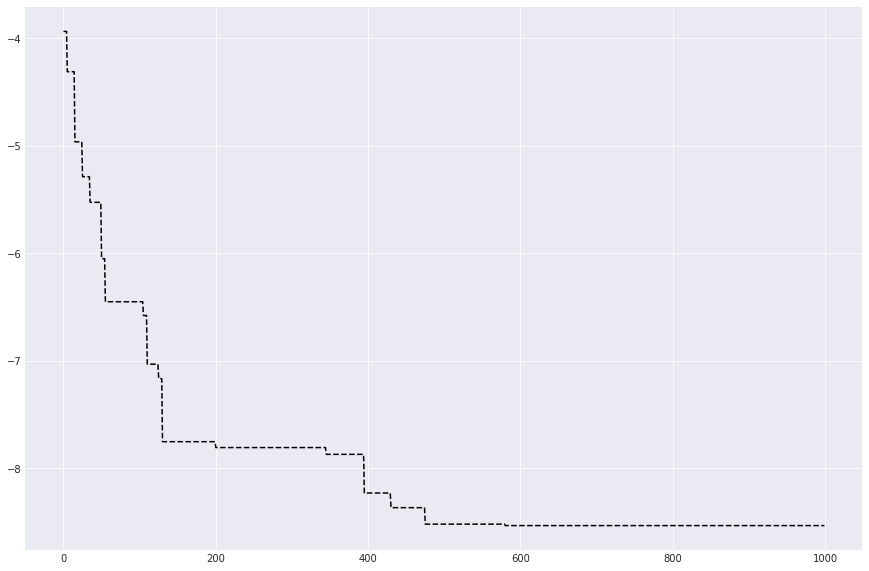

In [6]:
function_val_epoch_diversity = []
RANGE_OF_X = [-2.04 , 2.04]
POPULATION_SIZE = 1000
GENES = ["01" , "012" , "0123456789", "0123456789"]
TARGET_LENGTH = 4
h = 1e-7
X_SIZE = 5
DIVERSITY_PERCENT = 50


np.random.seed(np.random.randint(low=0 , high=100))
random.seed(np.random.randint(low=0 , high=100))

def f1(X):
    return np.sum(np.square(X))

def f2(X):
    return np.sum(np.floor(X))

def f3(X):
    return np.sum(np.multiply(np.arange(len(X)) , np.power(X , 4) ) ) + np.random.standard_normal(1)[0]

def g(X):
    return f1(X) + f2(X) + f3(X)

def determine_target_length(range_of_x):
    n = max(range_of_x)
    return int(np.ceil(np.log(n)/np.log(2)))

def getNum(l):
    num_str=""
    if l[0] == "1":
        num_str+="-"
    num_str += "{}.{}{}".format(l[1] , l[2], l[3])
    return float(num_str)

def inRange(l , range_of_x):
    num = getNum(l)
    return min(range_of_x)<= num <= max(range_of_x)

class Individual(object):

    def __init__(self,chromosome):
        self.chromosome = chromosome
        self.fitness = self.calculate_fitness()

    @classmethod 
    def mutate(self , digit_num:int):
        global GENES
        return random.choice(GENES[digit_num])
    
    @classmethod
    def create_gnome(self):
        global TARGET_LENGTH
        global RANGE_OF_X
        global X_SIZE
        gnome = []
        for i in range(X_SIZE):
            while True:
                l = [self.mutate(i) for i in range(TARGET_LENGTH)]
                if (inRange(l , RANGE_OF_X)):
                    gnome.append(l)
                    break
        return gnome


    def mate(self , par2):
        global DIVERSITY_PERCENT
        tot = len(self.chromosome)
        diversity_idx_arr = np.random.choice(range(tot) , 
                                        replace=False , 
                                        size=int(DIVERSITY_PERCENT*tot / 100))
            
        child_chromosome = []
        
        for j , gp1 , gp2 in zip(range(tot) , self.chromosome , par2.chromosome):
            child_part_chromosome = []
            for i in range(len(gp1)):
                if (j*tot+i) in diversity_idx_arr:
                    child_part_chromosome.append(self.mutate(i))
                else:
                    probability_of_p1_gene = random.random()
                    if probability_of_p1_gene > 0.5:
                        child_part_chromosome.append(gp1[i])
                    else:
                        child_part_chromosome.append(gp2[i])
                        
            child_chromosome.append(child_part_chromosome)
        return Individual(child_chromosome)

    def calculate_fitness(self):
        global TARGET_LENGTH
        X = []
        for s in self.chromosome:
            #print(s)
            #s = ''.join(map(str, self.chromosome))
            x = getNum(s)
            X.append(x)
        return g(X)
        


global POPULATION_SIZE
global TARGET_LENGTH
global RANGE_OF_X

# TARGET_LENGTH = determine_target_length(RANGE_OF_X)

generation = 1

count = 1000

population = []

for _ in range(POPULATION_SIZE):
    gnome = Individual.create_gnome()
    population.append(Individual(gnome))

while count!=0:
    count-=1
    population = sorted(population , key = lambda x:x.fitness)


    # performing elitism
    new_generation = []

    s = int(0.10*POPULATION_SIZE)
    new_generation.extend(population[:s])

    s = int(0.90*POPULATION_SIZE)

    for _ in range(s):
        # no elitism
        parent1 = random.choice(population[:POPULATION_SIZE])
        parent2 = random.choice(population[:POPULATION_SIZE])
        child = parent1.mate(parent2)
        new_generation.append(child)

    if generation % 5 ==0:
        population = new_generation
        get_num_arr = []
        for l in population[0].chromosome:
            get_num_arr.append(getNum(l))
        print("Gen: {} X: {} Fit: {}".format(generation, get_num_arr, population[0].fitness))

    function_val_epoch_diversity.append(population[0].fitness)
    generation += 1

get_num_arr = []
for l in population[0].chromosome:
    get_num_arr.append(getNum(l))
print("Gen: {} X: {}\tMinimimum Value: {}".format(generation, get_num_arr, population[0].fitness))


plt.plot(range(len(function_val_epoch_diversity)) , function_val_epoch_diversity , "k--")

## Using Random Search

Gen: 5 X: [0.4, -0.44, -0.3, 0.49, -0.06] Fit: -4.566818798489114
Gen: 10 X: [0.4, -0.44, -0.3, 0.49, -0.06] Fit: -4.566818798489114
Gen: 15 X: [0.4, -0.44, -0.3, 0.49, -0.06] Fit: -4.566818798489114
Gen: 20 X: [0.4, -0.44, -0.3, 0.49, -0.06] Fit: -4.566818798489114
Gen: 25 X: [0.4, -0.44, -0.3, 0.49, -0.06] Fit: -4.566818798489114
Gen: 30 X: [0.4, -0.44, -0.3, 0.49, -0.06] Fit: -4.566818798489114
Gen: 35 X: [0.4, -0.44, -0.3, 0.49, -0.06] Fit: -4.566818798489114
Gen: 40 X: [0.4, -0.44, -0.3, 0.49, -0.06] Fit: -4.566818798489114
Gen: 45 X: [0.4, -0.44, -0.3, 0.49, -0.06] Fit: -4.566818798489114
Gen: 50 X: [-1.02, -0.16, -0.26, -0.03, -0.37] Fit: -4.972204275695288
Gen: 55 X: [-1.02, -0.16, -0.26, -0.03, -0.37] Fit: -4.972204275695288
Gen: 60 X: [-1.02, -0.16, -0.26, -0.03, -0.37] Fit: -4.972204275695288
Gen: 65 X: [-1.02, -0.16, -0.26, -0.03, -0.37] Fit: -4.972204275695288
Gen: 70 X: [-1.02, -0.16, -0.26, -0.03, -0.37] Fit: -4.972204275695288
Gen: 75 X: [0.2, -0.32, -0.34, -0.01, -0.06

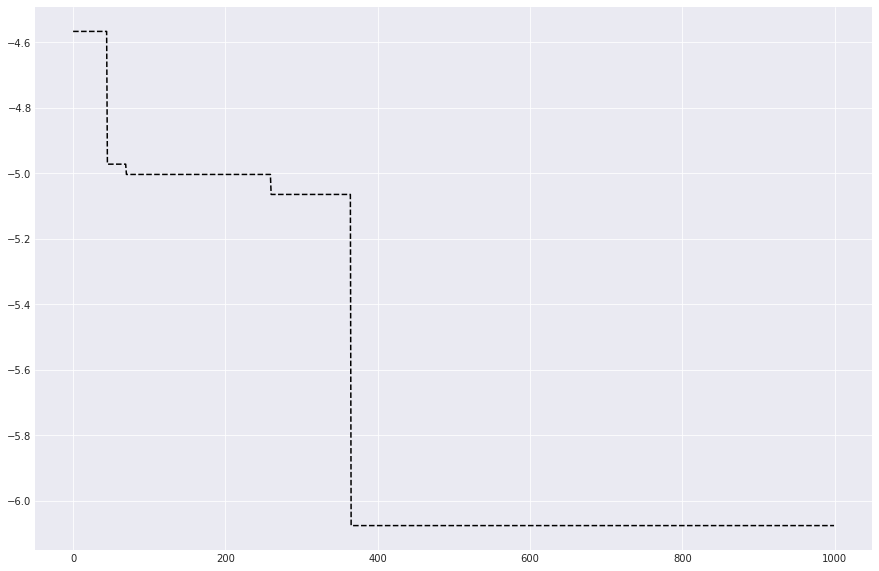

In [7]:
function_val_epoch_random_search = []
RANGE_OF_X = [-2.04 , 2.04]
POPULATION_SIZE = 1000
GENES = ["01" , "012" , "0123456789", "0123456789"]
TARGET_LENGTH = 4
h = 1e-7
X_SIZE = 5

np.random.seed(np.random.randint(low=0 , high=100))
random.seed(np.random.randint(low=0 , high=100))

def f1(X):
    return np.sum(np.square(X))

def f2(X):
    return np.sum(np.floor(X))

def f3(X):
    return np.sum(np.multiply(np.arange(len(X)) , np.power(X , 4) ) ) + np.random.standard_normal(1)[0]

def g(X):
    return f1(X) + f2(X) + f3(X)

def determine_target_length(range_of_x):
    n = max(range_of_x)
    return int(np.ceil(np.log(n)/np.log(2)))

def getNum(l):
    num_str=""
    if l[0] == "1":
        num_str+="-"
    num_str += "{}.{}{}".format(l[1] , l[2], l[3])
    return float(num_str)

def inRange(l , range_of_x):
    num = getNum(l)
    return min(range_of_x)<= num <= max(range_of_x)

class Individual(object):

    def __init__(self,chromosome):
        self.chromosome = chromosome
        self.fitness = self.calculate_fitness()

    @classmethod 
    def mutate(self , digit_num:int):
        global GENES
        return random.choice(GENES[digit_num])
    
    @classmethod
    def create_gnome(self):
        global TARGET_LENGTH
        global RANGE_OF_X
        global X_SIZE
        gnome = []
        for i in range(X_SIZE):
            while True:
                l = [self.mutate(i) for i in range(TARGET_LENGTH)]
                if (inRange(l , RANGE_OF_X)):
                    gnome.append(l)
                    break
        return gnome


    def mate(self , par2):
        child_chromosome = []
        
        for gp1 , gp2 in zip(self.chromosome , par2.chromosome):
            child_part_chromosome = []
#             print(gp1)
            for i in range(len(gp1)):
                probability_of_crossover = random.random()
                if (probability_of_crossover > 0.1):
                    # do crossover
                    probability_of_p1_gene = random.random()
                    if probability_of_p1_gene > 0.5:
                        child_part_chromosome.append(gp1[i])
                    else:
                        child_part_chromosome.append(gp2[i])
                else:
                    # do mutation
                    child_part_chromosome.append(self.mutate(i))
            child_chromosome.append(child_part_chromosome)
        return Individual(child_chromosome)

    def calculate_fitness(self):
        global TARGET_LENGTH
        X = []
        for s in self.chromosome:
            #print(s)
            #s = ''.join(map(str, self.chromosome))
            x = getNum(s)
            X.append(x)
        return g(X)
        


global POPULATION_SIZE
global TARGET_LENGTH
global RANGE_OF_X

# TARGET_LENGTH = determine_target_length(RANGE_OF_X)

generation = 1

count = 1000

population = []

for _ in range(POPULATION_SIZE):
    gnome = Individual.create_gnome()
    population.append(Individual(gnome))

while count!=0:
    count-=1
    population = sorted(population , key = lambda x:x.fitness)


    # performing elitism
    new_generation = []

    s = int(0.10*POPULATION_SIZE)
    new_generation.extend(population[:s])

    s = int(0.90*POPULATION_SIZE)

    for _ in range(s):
        # Random Search
        gnome = Individual.create_gnome()
        new_generation.append(Individual(gnome))
        


    if generation % 5 ==0:
        population = new_generation
        get_num_arr = []
        for l in population[0].chromosome:
            get_num_arr.append(getNum(l))
        print("Gen: {} X: {} Fit: {}".format(generation, get_num_arr, population[0].fitness))

    function_val_epoch_random_search.append(population[0].fitness)
    generation += 1

get_num_arr = []
for l in population[0].chromosome:
    get_num_arr.append(getNum(l))
print("Gen: {} X: {}\tMinimimum Value: {}".format(generation, get_num_arr, population[0].fitness))


plt.plot(range(len(function_val_epoch_random_search)) , function_val_epoch_random_search , "k--")

## Comparison:

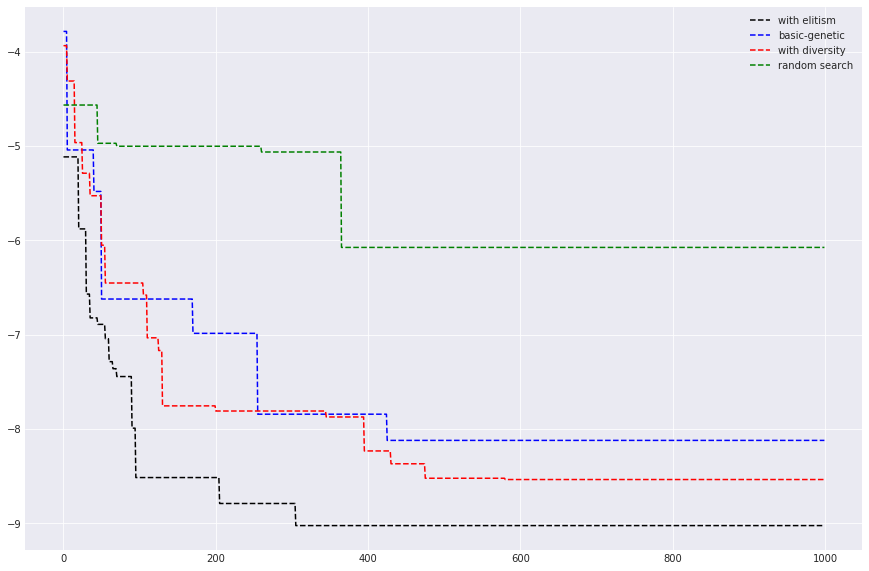

In [8]:
plt.plot(range(len(function_val_epoch_elitism)) , function_val_epoch_elitism , "k--")
plt.plot(range(len(function_val_epoch_basic_genetic)) , function_val_epoch_basic_genetic , "b--")
plt.plot(range(len(function_val_epoch_diversity)) , function_val_epoch_diversity , "r--")
plt.plot(range(len(function_val_epoch_random_search)) , function_val_epoch_random_search , "g--")
plt.legend(["with elitism" , "basic-genetic" , "with diversity" , "random search"])

### Clearly, Random Search is worst approach for this kind of the problems, it's complete luck.

## Elitism: with different sample count

Population: 50 X: [-0.71, -0.03, -0.05, -0.24, -0.05]	Minimimum Value: -7.423175616939729
Population: 100 X: [-0.15, -0.36, -0.03, -0.23, -0.04]	Minimimum Value: -8.358071308792296
Population: 500 X: [-0.08, -0.02, -0.08, -0.01, -0.13]	Minimimum Value: -8.776798931437748
Population: 1000 X: [-0.01, -0.11, -0.18, -0.23, -0.27]	Minimimum Value: -8.948559792465993


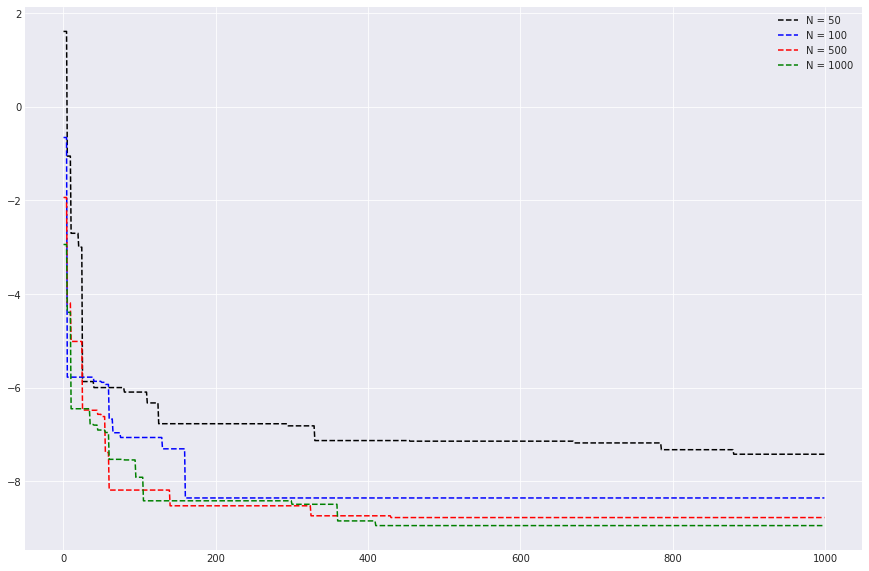

In [12]:
RANGE_OF_X = [-2.04 , 2.04]
POPULATION_SIZE = [50 ,100 , 500 , 1000]
GENES = ["01" , "012" , "0123456789", "0123456789"]
TARGET_LENGTH = 4
CROSSOVER_PROB = 0.1
h = 1e-7
X_SIZE = 5

np.random.seed(np.random.randint(low=0 , high=100))
random.seed(np.random.randint(low=0 , high=100))


def f1(X):
    return np.sum(np.square(X))

def f2(X):
    return np.sum(np.floor(X))

def f3(X):
    return np.sum(np.multiply(np.arange(len(X)) , np.power(X , 4) ) ) + np.random.standard_normal(1)[0]

def g(X):
    return f1(X) + f2(X) + f3(X)

def determine_target_length(range_of_x):
    n = max(range_of_x)
    return int(np.ceil(np.log(n)/np.log(2)))

def getNum(l):
    num_str=""
    if l[0] == "1":
        num_str+="-"
    num_str += "{}.{}{}".format(l[1] , l[2], l[3])
    return float(num_str)

def inRange(l , range_of_x):
    num = getNum(l)
    return min(range_of_x)<= num <= max(range_of_x)

class Individual(object):

    def __init__(self,chromosome):
        self.chromosome = chromosome
        self.fitness = self.calculate_fitness()

    @classmethod 
    def mutate(self , digit_num:int):
        global GENES
        return random.choice(GENES[digit_num])
    
    @classmethod
    def create_gnome(self):
        global TARGET_LENGTH
        global RANGE_OF_X
        global X_SIZE
        gnome = []
        for i in range(X_SIZE):
            while True:
                l = [self.mutate(i) for i in range(TARGET_LENGTH)]
                if (inRange(l , RANGE_OF_X)):
                    gnome.append(l)
                    break
        return gnome


    def mate(self , par2):
        global CROSSOVER_PROB
        child_chromosome = []
        
        for gp1 , gp2 in zip(self.chromosome , par2.chromosome):
            child_part_chromosome = []
#             print(gp1)
            for i in range(len(gp1)):
                probability_of_crossover = random.random()
                if (probability_of_crossover > CROSSOVER_PROB):
                    # do crossover
                    probability_of_p1_gene = random.random()
                    if probability_of_p1_gene > 0.5:
                        child_part_chromosome.append(gp1[i])
                    else:
                        child_part_chromosome.append(gp2[i])
                else:
                    # do mutation
                    child_part_chromosome.append(self.mutate(i))
            child_chromosome.append(child_part_chromosome)
        return Individual(child_chromosome)

    def calculate_fitness(self):
        global TARGET_LENGTH
        X = []
        for s in self.chromosome:
            #print(s)
            #s = ''.join(map(str, self.chromosome))
            x = getNum(s)
            X.append(x)
        return g(X)
        


global POPULATION_SIZE
global TARGET_LENGTH
global RANGE_OF_X

color = ["k--" , "b--" , "r--" , "g--" , "y--"]
legend = []
for N, c in zip(POPULATION_SIZE , color):
    np.random.seed(np.random.randint(low=0 , high=100))
    random.seed(np.random.randint(low=0 , high=100))
    function_val_epoch_elitism = []
    generation = 1

    count = 1000

    population = []
    for _ in range(N):
        gnome = Individual.create_gnome()
        population.append(Individual(gnome))

    while count!=0:
        count-=1
        population = sorted(population , key = lambda x:x.fitness)


        # performing elitism
        new_generation = []

        s = int(0.10*N)
        new_generation.extend(population[:s])

        s = int(0.90*N)

        for _ in range(s):
            parent1 = random.choice(population[:N//2])
            parent2 = random.choice(population[:N//2])
            child = parent1.mate(parent2)
            new_generation.append(child)

        if generation % 5 ==0:
            population = new_generation
            get_num_arr = []
            for l in population[0].chromosome:
                get_num_arr.append(getNum(l))
            #print("Gen: {} X: {} Fit: {}".format(generation, get_num_arr, population[0].fitness))

        function_val_epoch_elitism.append(population[0].fitness)
        generation += 1

    get_num_arr = []
    for l in population[0].chromosome:
        get_num_arr.append(getNum(l))
    print("Population: {} X: {}\tMinimimum Value: {}".format(N, get_num_arr, population[0].fitness))
    plt.plot(range(len(function_val_epoch_elitism)) , function_val_epoch_elitism , c)
    legend.append("N = {}".format(N))
plt.legend(legend)

The result above is as expected for a genetic algorithm with elitism. The more the size of the population the diversity and the fitness is maintained at the same time, which in principle yields (most of the time) a better result on increasing the size of the population with a suitable number of epochs.

## Basic Genetic Algorithm : with different sample count

Population: 50 X: [-0.32, -0.25, -0.26, -0.24, -0.03]	Minimimum Value: -7.314303773893771
Population: 100 X: [0.14, -0.04, -0.23, -0.35, -0.21]	Minimimum Value: -6.909335612272095
Population: 500 X: [-0.26, -0.56, -0.04, -0.24, -0.08]	Minimimum Value: -8.875460202474713
Population: 1000 X: [-0.08, -0.46, -0.16, -0.19, -0.05]	Minimimum Value: -7.921433360804886


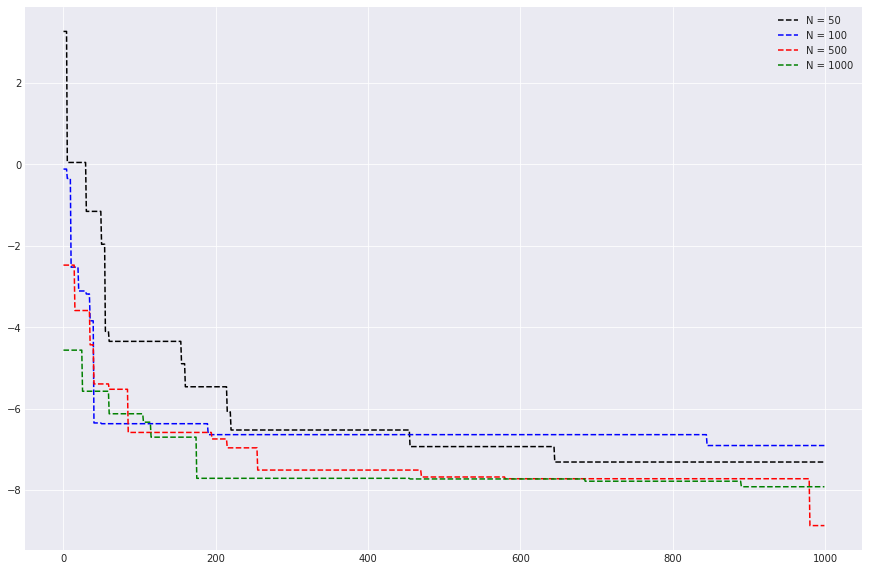

In [19]:
function_val_epoch_basic_genetic = []
RANGE_OF_X = [-2.04 , 2.04]
POPULATION_SIZE = [50, 100, 500, 1000]
GENES = ["01" , "012" , "0123456789", "0123456789"]
TARGET_LENGTH = 4
CROSSOVER_PROB = 0.1
h = 1e-7
X_SIZE = 5

def f1(X):
    return np.sum(np.square(X))

def f2(X):
    return np.sum(np.floor(X))

def f3(X):
    return np.sum(np.multiply(np.arange(len(X)) , np.power(X , 4) ) ) + np.random.standard_normal(1)[0]

def g(X):
    return f1(X) + f2(X) + f3(X)

def determine_target_length(range_of_x):
    n = max(range_of_x)
    return int(np.ceil(np.log(n)/np.log(2)))

def getNum(l):
    num_str=""
    if l[0] == "1":
        num_str+="-"
    num_str += "{}.{}{}".format(l[1] , l[2], l[3])
    return float(num_str)

def inRange(l , range_of_x):
    num = getNum(l)
    return min(range_of_x)<= num <= max(range_of_x)

class Individual(object):

    def __init__(self,chromosome):
        self.chromosome = chromosome
        self.fitness = self.calculate_fitness()

    @classmethod 
    def mutate(self , digit_num:int):
        global GENES
        return random.choice(GENES[digit_num])
    
    @classmethod
    def create_gnome(self):
        global TARGET_LENGTH
        global RANGE_OF_X
        global X_SIZE
        gnome = []
        for i in range(X_SIZE):
            while True:
                l = [self.mutate(i) for i in range(TARGET_LENGTH)]
                if (inRange(l , RANGE_OF_X)):
                    gnome.append(l)
                    break
        return gnome


    def mate(self , par2):
        child_chromosome = []
        global CROSSOVER_PROB
        for gp1 , gp2 in zip(self.chromosome , par2.chromosome):
            child_part_chromosome = []
#             print(gp1)
            for i in range(len(gp1)):
                probability_of_crossover = random.random()
                if (probability_of_crossover > CROSSOVER_PROB):
                    # do crossover
                    probability_of_p1_gene = random.random()
                    if probability_of_p1_gene > 0.5:
                        child_part_chromosome.append(gp1[i])
                    else:
                        child_part_chromosome.append(gp2[i])
                else:
                    # do mutation
                    child_part_chromosome.append(self.mutate(i))
            child_chromosome.append(child_part_chromosome)
        return Individual(child_chromosome)

    def calculate_fitness(self):
        global TARGET_LENGTH
        X = []
        for s in self.chromosome:
            #print(s)
            #s = ''.join(map(str, self.chromosome))
            x = getNum(s)
            X.append(x)
        return g(X)
        


global POPULATION_SIZE
global TARGET_LENGTH
global RANGE_OF_X

# TARGET_LENGTH = determine_target_length(RANGE_OF_X)
color = ["k--" , "b--" , "r--" , "g--" , "y--"]
legend = []
for N, c in zip(POPULATION_SIZE , color):
    np.random.seed(np.random.randint(low=0 , high=100))
    random.seed(np.random.randint(low=0 , high=100))
    
    function_val_epoch_basic_genetic = []

    generation = 1

    count = 1000

    population = []

    for _ in range(N):
        gnome = Individual.create_gnome()
        population.append(Individual(gnome))

    while count!=0:
        count-=1
        population = sorted(population , key = lambda x:x.fitness)


        # performing elitism
        new_generation = []

        s = int(0.10*N)
        new_generation.extend(population[:s])

        s = int(0.90*N)

        for _ in range(s):
            # no elitism
            parent1 = random.choice(population[:N])
            parent2 = random.choice(population[:N])
            child = parent1.mate(parent2)
            new_generation.append(child)

        if generation % 5 ==0:
            population = new_generation
            get_num_arr = []
            for l in population[0].chromosome:
                get_num_arr.append(getNum(l))
            #print("Gen: {} X: {} Fit: {}".format(generation, get_num_arr, population[0].fitness))

        function_val_epoch_basic_genetic.append(population[0].fitness)
        generation += 1

    get_num_arr = []
    for l in population[0].chromosome:
        get_num_arr.append(getNum(l))

    print("Population: {} X: {}\tMinimimum Value: {}".format(N, get_num_arr, population[0].fitness))
    plt.plot(range(len(function_val_epoch_basic_genetic)) , function_val_epoch_basic_genetic , c)
    legend.append("N = {}".format(N))

plt.legend(legend)

Unlike genetic algorithm with elitism, in basic genetic algorithm the complete population get the chance to mate(crossover and mutation) which may or may not improve the results on increasing the size of the population, because increasing the size of the population also expose us to the risk that elite members will not get chance to mate.

## Diversity: with the different sample counts

Population: 50 X: [-0.39, -0.2, -0.13, -0.01, -0.3]	Minimimum Value: -8.002973851495726
Population: 100 X: [-0.07, -0.16, -0.05, -0.22, -0.34]	Minimimum Value: -7.915400920312548
Population: 500 X: [-1.08, -0.1, -0.35, -0.02, -0.18]	Minimimum Value: -9.177451964813589
Population: 1000 X: [-0.05, -0.04, -0.11, -0.24, -0.04]	Minimimum Value: -9.030058205773974


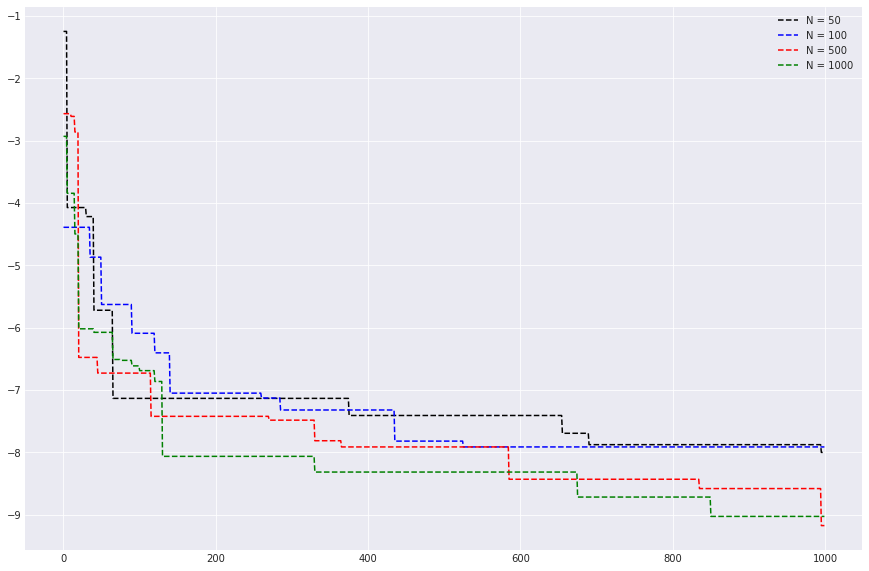

In [22]:
function_val_epoch_diversity = []
RANGE_OF_X = [-2.04 , 2.04]
POPULATION_SIZE = [50 , 100 , 500 , 1000]
GENES = ["01" , "012" , "0123456789", "0123456789"]
TARGET_LENGTH = 4
h = 1e-7
X_SIZE = 5
DIVERSITY_PERCENT = 50


np.random.seed(np.random.randint(low=0 , high=100))
random.seed(np.random.randint(low=0 , high=100))

def f1(X):
    return np.sum(np.square(X))

def f2(X):
    return np.sum(np.floor(X))

def f3(X):
    return np.sum(np.multiply(np.arange(len(X)) , np.power(X , 4) ) ) + np.random.standard_normal(1)[0]

def g(X):
    return f1(X) + f2(X) + f3(X)

def determine_target_length(range_of_x):
    n = max(range_of_x)
    return int(np.ceil(np.log(n)/np.log(2)))

def getNum(l):
    num_str=""
    if l[0] == "1":
        num_str+="-"
    num_str += "{}.{}{}".format(l[1] , l[2], l[3])
    return float(num_str)

def inRange(l , range_of_x):
    num = getNum(l)
    return min(range_of_x)<= num <= max(range_of_x)

class Individual(object):

    def __init__(self,chromosome):
        self.chromosome = chromosome
        self.fitness = self.calculate_fitness()

    @classmethod 
    def mutate(self , digit_num:int):
        global GENES
        return random.choice(GENES[digit_num])
    
    @classmethod
    def create_gnome(self):
        global TARGET_LENGTH
        global RANGE_OF_X
        global X_SIZE
        gnome = []
        for i in range(X_SIZE):
            while True:
                l = [self.mutate(i) for i in range(TARGET_LENGTH)]
                if (inRange(l , RANGE_OF_X)):
                    gnome.append(l)
                    break
        return gnome


    def mate(self , par2):
        global DIVERSITY_PERCENT
        tot = len(self.chromosome)
        diversity_idx_arr = np.random.choice(range(tot) , 
                                        replace=False , 
                                        size=int(DIVERSITY_PERCENT*tot / 100))
            
        child_chromosome = []
        
        for j , gp1 , gp2 in zip(range(tot) , self.chromosome , par2.chromosome):
            child_part_chromosome = []
            for i in range(len(gp1)):
                if (j*tot+i) in diversity_idx_arr:
                    child_part_chromosome.append(self.mutate(i))
                else:
                    probability_of_p1_gene = random.random()
                    if probability_of_p1_gene > 0.5:
                        child_part_chromosome.append(gp1[i])
                    else:
                        child_part_chromosome.append(gp2[i])
                        
            child_chromosome.append(child_part_chromosome)
        return Individual(child_chromosome)

    def calculate_fitness(self):
        global TARGET_LENGTH
        X = []
        for s in self.chromosome:
            #print(s)
            #s = ''.join(map(str, self.chromosome))
            x = getNum(s)
            X.append(x)
        return g(X)
        


global POPULATION_SIZE
global TARGET_LENGTH
global RANGE_OF_X

# TARGET_LENGTH = determine_target_length(RANGE_OF_X)
color = ["k--" , "b--" , "r--" , "g--" , "y--"]
legend = []
for N, c in zip(POPULATION_SIZE , color):
    np.random.seed(np.random.randint(low=0 , high=100))
    random.seed(np.random.randint(low=0 , high=100))
    
    function_val_epoch_diversity = []

    generation = 1

    count = 1000

    population = []

    for _ in range(N):
        gnome = Individual.create_gnome()
        population.append(Individual(gnome))

    while count!=0:
        count-=1
        population = sorted(population , key = lambda x:x.fitness)


        # performing elitism
        new_generation = []

        s = int(0.10*N)
        new_generation.extend(population[:s])

        s = int(0.90*N)

        for _ in range(s):
            # no elitism
            parent1 = random.choice(population[:N])
            parent2 = random.choice(population[:N])
            child = parent1.mate(parent2)
            new_generation.append(child)

        if generation % 5 ==0:
            population = new_generation
            get_num_arr = []
            for l in population[0].chromosome:
                get_num_arr.append(getNum(l))
            #print("Gen: {} X: {} Fit: {}".format(generation, get_num_arr, population[0].fitness))

        function_val_epoch_diversity.append(population[0].fitness)
        generation += 1

    get_num_arr = []
    for l in population[0].chromosome:
        get_num_arr.append(getNum(l))
    print("Population: {} X: {}\tMinimimum Value: {}".format(N, get_num_arr, population[0].fitness))
    plt.plot(range(len(function_val_epoch_diversity)) , function_val_epoch_diversity , c)
    legend.append("N = {}".format(N))
plt.legend(legend)

I don't even need to state that this is the best results by far we have got. Just like the elitism it is also affected by increasing the population size and the overall trend is that the performance(on an average) increases.

## Random Search : with different sample counts

Population: 50 X: [-1.07, -0.59, -0.18, -0.09, 0.61]	Minimimum Value: -4.150216119472115
Population: 100 X: [-1.34, -0.38, -0.14, -0.11, 0.34]	Minimimum Value: -5.247213375510198
Population: 500 X: [-0.11, -0.57, -0.12, -0.1, 0.18]	Minimimum Value: -6.707476516282099
Population: 1000 X: [-1.32, -0.42, -0.01, -0.27, -0.19]	Minimimum Value: -5.635770854849166


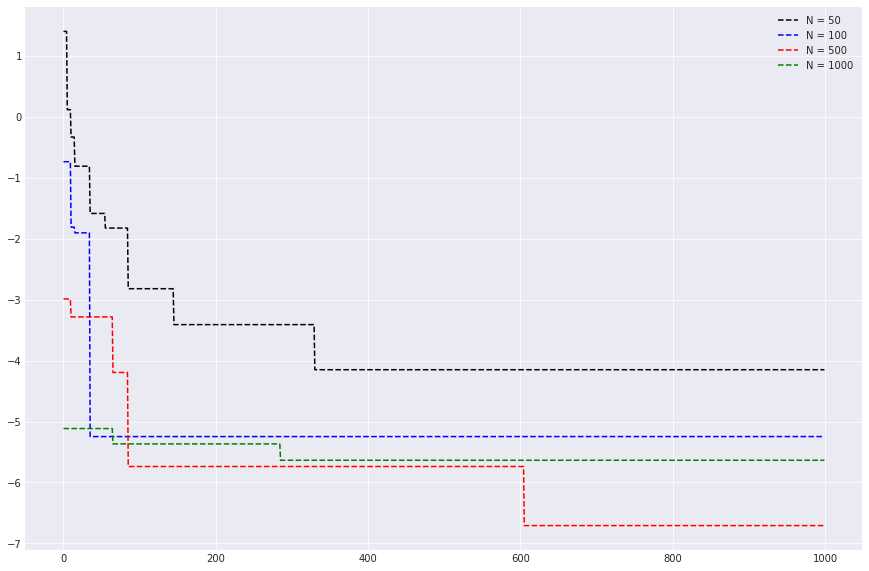

In [24]:
function_val_epoch_random_search = []
RANGE_OF_X = [-2.04 , 2.04]
POPULATION_SIZE = [50, 100, 500, 1000]
GENES = ["01" , "012" , "0123456789", "0123456789"]
TARGET_LENGTH = 4
h = 1e-7
X_SIZE = 5

np.random.seed(np.random.randint(low=0 , high=100))
random.seed(np.random.randint(low=0 , high=100))

def f1(X):
    return np.sum(np.square(X))

def f2(X):
    return np.sum(np.floor(X))

def f3(X):
    return np.sum(np.multiply(np.arange(len(X)) , np.power(X , 4) ) ) + np.random.standard_normal(1)[0]

def g(X):
    return f1(X) + f2(X) + f3(X)

def determine_target_length(range_of_x):
    n = max(range_of_x)
    return int(np.ceil(np.log(n)/np.log(2)))

def getNum(l):
    num_str=""
    if l[0] == "1":
        num_str+="-"
    num_str += "{}.{}{}".format(l[1] , l[2], l[3])
    return float(num_str)

def inRange(l , range_of_x):
    num = getNum(l)
    return min(range_of_x)<= num <= max(range_of_x)

class Individual(object):

    def __init__(self,chromosome):
        self.chromosome = chromosome
        self.fitness = self.calculate_fitness()

    @classmethod 
    def mutate(self , digit_num:int):
        global GENES
        return random.choice(GENES[digit_num])
    
    @classmethod
    def create_gnome(self):
        global TARGET_LENGTH
        global RANGE_OF_X
        global X_SIZE
        gnome = []
        for i in range(X_SIZE):
            while True:
                l = [self.mutate(i) for i in range(TARGET_LENGTH)]
                if (inRange(l , RANGE_OF_X)):
                    gnome.append(l)
                    break
        return gnome


    def mate(self , par2):
        child_chromosome = []
        
        for gp1 , gp2 in zip(self.chromosome , par2.chromosome):
            child_part_chromosome = []
#             print(gp1)
            for i in range(len(gp1)):
                probability_of_crossover = random.random()
                if (probability_of_crossover > 0.1):
                    # do crossover
                    probability_of_p1_gene = random.random()
                    if probability_of_p1_gene > 0.5:
                        child_part_chromosome.append(gp1[i])
                    else:
                        child_part_chromosome.append(gp2[i])
                else:
                    # do mutation
                    child_part_chromosome.append(self.mutate(i))
            child_chromosome.append(child_part_chromosome)
        return Individual(child_chromosome)

    def calculate_fitness(self):
        global TARGET_LENGTH
        X = []
        for s in self.chromosome:
            #print(s)
            #s = ''.join(map(str, self.chromosome))
            x = getNum(s)
            X.append(x)
        return g(X)
        


global POPULATION_SIZE
global TARGET_LENGTH
global RANGE_OF_X

# TARGET_LENGTH = determine_target_length(RANGE_OF_X)
color = ["k--" , "b--" , "r--" , "g--" , "y--"]
legend = []
for N, c in zip(POPULATION_SIZE , color):
    np.random.seed(np.random.randint(low=0 , high=100))
    random.seed(np.random.randint(low=0 , high=100))
    
    function_val_epoch_random_search = []
    generation = 1

    count = 1000

    population = []

    for _ in range(N):
        gnome = Individual.create_gnome()
        population.append(Individual(gnome))

    while count!=0:
        count-=1
        population = sorted(population , key = lambda x:x.fitness)


        # performing elitism
        new_generation = []

        s = int(0.10*N)
        new_generation.extend(population[:s])

        s = int(0.90*N)

        for _ in range(s):
            # Random Search
            gnome = Individual.create_gnome()
            new_generation.append(Individual(gnome))



        if generation % 5 ==0:
            population = new_generation
            get_num_arr = []
            for l in population[0].chromosome:
                get_num_arr.append(getNum(l))
            # print("Gen: {} X: {} Fit: {}".format(generation, get_num_arr, population[0].fitness))

        function_val_epoch_random_search.append(population[0].fitness)
        generation += 1

    get_num_arr = []
    for l in population[0].chromosome:
        get_num_arr.append(getNum(l))
    print("Population: {} X: {}\tMinimimum Value: {}".format(N, get_num_arr, population[0].fitness))
    plt.plot(range(len(function_val_epoch_random_search)) , function_val_epoch_random_search , c)
    legend.append("N = {}".format(N))
plt.legend(legend)

Clearly, Random Search is completely out of this league. It doesn't stand a chance while comparing with the other algorithms. I won't even try it again. It's complete brute force. If you are very lucky(which is impossible) then you have a chance of getting a good result through random search.